This workboon has both relavent tag collection and bert similarity. At last this book contains graph of tag similarity count graph.

In [2]:
!pip install stackapi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from stackapi import StackAPI
SITE = StackAPI('stackoverflow')

In [100]:
import pandas as pd
# import nltk
unique_tags_dict_wiki = pd.read_pickle(r'/content/unique_tags_dict_wiki.pkl')
user_tags_dict = pd.read_pickle(r'/content/user_tags_dict.pkl')
userid = pd.read_pickle(r'/content/User_Id.pkl')
final_most_relevant_tag_old= pd.read_pickle(r'/content/final_most_relevant_tag.pkl')
relevant_tag=pd.read_pickle(r'/content/relavent_tag.pkl')
prep_rocessed_tag_wiki_for_Sentence_similarity=pd.read_pickle(r'/content/prep_rocessed_tag_wiki_for_Sentence_similarity.pkl')

In [5]:
tags=list(unique_tags_dict_wiki.keys())
SITE = StackAPI('stackoverflow', key='44hpaaJESWN4fN22RgRZTg((')

In [6]:
def relevant_tag_collection(tag_name):
  relavent_tags=[]
  comments = SITE.fetch('tags/{tags}/related',tags={tag_name})
  for i in range(len((comments['items']))):
    relavent_tags.append(comments['items'][i]['name'])
  return relavent_tags

In [7]:
relavent_tag={}


In [8]:
for tag in tags:
  if tag not in relavent_tag.keys():
    SITE = StackAPI('stackoverflow',key='44hpaaJESWN4fN22RgRZTg((')
    relavent_tag[tag]=relevant_tag_collection(tag)

In [ ]:
import pickle
with open('relavent_tag.pkl', 'wb') as f:
  pickle.dump(relavent_tag, f)

In [3]:
!pip install sent2vec


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


NameError: ignored

In [5]:
from scipy import spatial
from sent2vec.vectorizer import Vectorizer
vectorizer = Vectorizer()
def sentences_similarity(sen1,sen2):
  sentences=[]
  sentences.append(sen1)
  sentences.append(sen2)
  vectorizer.run(sentences)
  vectors_bert = vectorizer.vectors
  dist_1 = spatial.distance.cosine(vectors_bert[0], vectors_bert[1])
  return dist_1

Initializing Bert distilbert-base-uncased
Vectorization done on cpu


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [23]:
from scipy import spatial
def sentences_similarity_cosine(sen1,sen2):
  dist_1 = spatial.distance.cosine(sen1, sen1)
  return dist_1

In [16]:
preprocessed_tags_dict=list(prep_rocessed_tag_wiki_for_Sentence_similarity.values())
vectorizer.run(preprocessed_tags_dict)
vectors_bert = vectorizer.vectors

In [44]:
# import pickle
# with open('total_index_based_tags_embedding_bert.pkl', 'wb') as f:
#   pickle.dump(vectors_bert, f)

In [71]:
import sklearn
def cosine_similarity_sklearn(vector1,vector2):
  vectors_bert_0=[vector1]
  vectors_bert_1=[vector2]
  (sklearn.metrics.pairwise.cosine_similarity(vectors_bert_0,vectors_bert_1, dense_output=True)[0][0])

In [57]:
# for index in range(len(prep_rocessed_tag_wiki_for_Sentence_similarity)):
bert_average_embedding_tags= pd.read_pickle(r'/content/bert_average_embedding_tags.pkl')

In [23]:
# !pip uninstall nltk
!pip install -U nltk
import nltk
nltk.download('punkt')
def sentence_filter(raw_str):
  import re
  import string
  # !pip install maketrans
  # from string import maketrans
  raw_str = raw_str.lower()
  result1 = re.sub(r'\d+', '', raw_str)
  result1 = result1.translate(str.maketrans('', '', string.punctuation))
  result1 = result1.strip()

  # stop_words = set(stopwords.words(‘english’))
  # from nltk.tokenize import word_tokenize
  # tokens = word_tokenize(result1)
  # result = [i for i in tokens if not i in stop_words]
  from gensim.parsing.preprocessing import remove_stopwords
  result1 = remove_stopwords(result1)


  # stemming
  from nltk.stem import PorterStemmer
  from nltk.tokenize import word_tokenize
  stemmer= PorterStemmer()
  input_str=word_tokenize(result1)
  result1=''
  for word in input_str:
      result1=result1+(stemmer.stem(word))
      result1=result1+' '

  # tokenize words
  # from nltk.tokenize import word_tokenize
  # word_tokenize=word_tokenize(result1)
  return result1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [24]:
prep_rocessed_tag_wiki_for_Sentence_similarity={}
for tag in tags:
  prep_rocessed_tag_wiki_for_Sentence_similarity[tag]=sentence_filter(unique_tags_dict_wiki[tag])


In [26]:
import pickle
with open('prep_rocessed_tag_wiki_for_Sentence_similarity.pkl', 'wb') as f:
  pickle.dump(prep_rocessed_tag_wiki_for_Sentence_similarity, f)

In [59]:
total_keys=list(unique_tags_dict_wiki.keys())
most_relevant_tag_BERT={}
all_two_tags={}
for tag in total_keys:
  two_tags=[]
  two_tags.append(tag)
  for cotag in total_keys:
    cotag_list=[]
    cotag_list.append(tag)
    cotag_list.append(cotag)
    two_tags.append(cotag_list)
  all_two_tags[tag]=two_tags

In [86]:
print(cosine_similarity_sklearn(bert_average_embedding_tags['python'],bert_average_embedding_tags['pandas']))

None
0.9997767


In [87]:
count=0
import heapq
tag_similarity_score_sklearn={}
catch_list=[]
for tag_name in total_keys:
  co_tag_list=list(all_two_tags[tag_name])
  similarity_value_tag={}
  for i in co_tag_list:
    if len(i)==2:
      try:
        # first_tag=str(prep_rocessed_tag_wiki_for_Sentence_similarity[i[0]])
        # second_tag=str(prep_rocessed_tag_wiki_for_Sentence_similarity[i[1]])
        # similarity_value=100*sentences_similarity(first_tag,second_tag)
        similarity_value=(sklearn.metrics.pairwise.cosine_similarity([bert_average_embedding_tags[i[0]]],[bert_average_embedding_tags[i[1]]], dense_output=True)[0][0])
        # print(i[0])
        # print(i[1])
        similarity_value_tag[i[1]]=similarity_value
        count=count+1
      except:
        catch_list.append(i[1])
      # print(count)
  # print(tag_name)
  # tag_similarity_score_sklearn[tag_name]=similarity_value_tag
  most_relevant_tag_BERT[tag_name]=heapq.nlargest(15, similarity_value_tag, key=similarity_value_tag.get)

In [88]:
# import pickle
# with open('bert_average_embedding_tags.pkl', 'wb') as f:
#   pickle.dump(bert_average_embedding_tags, f)


['directory',
 'gitignore',
 'editor',
 'ide',
 'file-io',
 'wcf',
 'extract',
 'dockerfile',
 'final',
 'material-design',
 'modal-dialog',
 'indy',
 'codeigniter',
 'entity-framework-core',
 'grid-layout']

In [95]:
most_relevant_tag_BERT['html']

['html',
 'struct',
 'arrays',
 'shutdown',
 'boost-spirit',
 'sfinae',
 'kotlin',
 'qml',
 'intellij-idea',
 'xml',
 'revision',
 'heroku',
 'amazon-web-services',
 'asp.net-core-mvc',
 'tensorflow']

In [89]:
import pickle
with open('most_relevant_tag_BERT.pkl', 'wb') as f:
  pickle.dump(most_relevant_tag_BERT, f)

In [96]:
bert_average_embedding_tags= pd.read_pickle(r'/content/bert_average_embedding_tags.pkl')

In [31]:
import numpy
from numpy import array, average
def embeddings_average(word_embeddings):
    array_lol1 = array(word_embeddings)
    average_vector = average(array_lol1, axis=0)
    return average_vector
  # array_lol2 = array(word_embeddings2)
  # average_pandas = average(array_lol2, axis=0)

In [32]:
bert_average_embedding_tags={}
for tag in tags:
  bert_average_embedding_tags[tag]=embeddings_average(bert_encodings_tags[tag])


In [34]:
import pickle
with open('bert_average_embedding_tags.pkl', 'wb') as f:
  pickle.dump(bert_average_embedding_tags, f)

In [102]:
# to get intersection of relavent tags from Chars2Vec and stackovwerflow data. 

tags=list(unique_tags_dict_wiki.keys())
intersection_tags_count={}
def intersection_two_dict(x):
  a=final_most_relevant_tag_old[x]
  b=relevant_tag[x]
  return list(set(a) & set(b))
for tag in tags:
  intersection_tags_count[tag]=len(intersection_two_dict(tag))

In [116]:
tags=list(unique_tags_dict_wiki.keys())
intersection_tags_count_char2vec={}
def intersection_two_dict(x):
  a=final_most_relevant_tag_old[x]
  b=relevant_tag[x]
  return list(set(a) & set(b))
for tag in tags:
  intersection_tags_count_char2vec[tag]=len(intersection_two_dict(tag))

In [109]:

tags=list(unique_tags_dict_wiki.keys())
intersection_tags_count_bert={}
def intersection_two_dict(x):
  a=most_relevant_tag_BERT[x]
  b=relevant_tag[x]
  return list(set(a) & set(b))
for tag in tags:
  intersection_tags_count_bert[tag]=len(intersection_two_dict(tag))

In [160]:
dict_filter = lambda x, y: dict([ (i,x[i]) for i in x if i in set(y) ])
import random
random_dict_keys=r = [random.choice(list(intersection_tags_count_bert)) for i in range(8)]
small_dict_bert=dict_filter(intersection_tags_count_bert, random_dict_keys)
small_dict_char2vec=dict_filter(intersection_tags_count_char2vec, random_dict_keys)

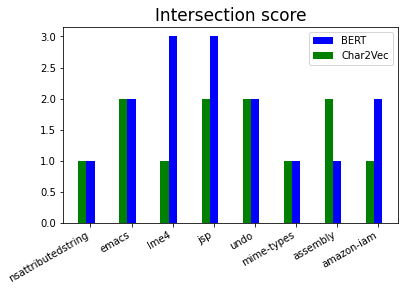

<Figure size 7200x7360 with 0 Axes>

In [161]:
import numpy as np
import matplotlib.pyplot as plt


from matplotlib.pyplot import figure
X = np.arange(len(small_dict_bert))
ax = plt.subplot(111)
ax.bar(X, small_dict_bert.values(), width=0.2, color='b', align='center')
ax.bar(X-0.2, small_dict_char2vec.values(), width=0.2, color='g', align='center')
ax.legend(('BERT','Char2Vec'))
plt.xticks(X, small_dict_bert.keys())
plt.title("Intersection score", fontsize=17)
plt.gcf().autofmt_xdate()    
figure(figsize=(90, 92), dpi=80)

plt.show()

In [168]:
Bert_count=0
char2vec=0
for tag in tags:
  if intersection_tags_count_bert[tag]>intersection_tags_count_char2vec[tag]:
    Bert_count=Bert_count+1
  elif intersection_tags_count_char2vec[tag]>intersection_tags_count_bert[tag]:
    char2vec=char2vec+1

In [169]:
Bert_count

481

In [170]:
char2vec

471